In [80]:
import os

os.chdir('C:/Users/user/Downloads/')

import pandas as pd
import numpy as np
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

В данной работе будет использоваться набор данных Loan Prediction Problem Dataset (https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv) - прогноз выдачи кредита по данным заявителя.

In [143]:
loan_prediction_train = pd.read_csv('loan prediction dataset train.csv')
loan_prediction_train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [144]:
loan_prediction_train.shape

(614, 13)

In [145]:
loan_prediction_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [146]:
loan_prediction_train['LoanAmount'] = loan_prediction_train['LoanAmount'].fillna(loan_prediction_train['LoanAmount'].mean())

In [147]:
loan_prediction_train['Credit_History'] = loan_prediction_train['Credit_History'].fillna(loan_prediction_train['Credit_History'].median())

In [148]:
loan_prediction_train.dropna(inplace=True)

Визуализируем некоторые интересные зависимости:

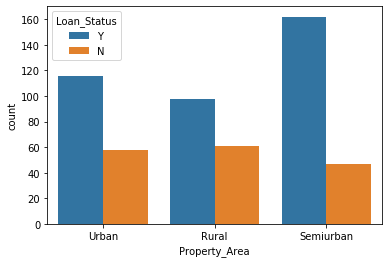

In [13]:
sns.countplot(loan_prediction_train['Property_Area'], hue = loan_prediction_train['Loan_Status'])

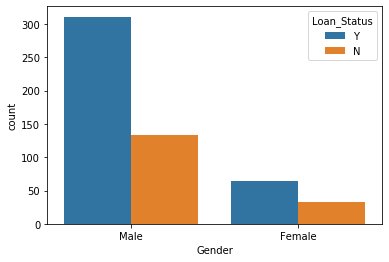

In [14]:
sns.countplot(loan_prediction_train['Gender'], hue = loan_prediction_train['Loan_Status'])

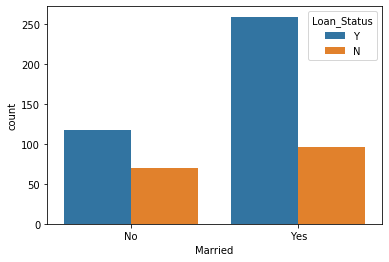

In [16]:
sns.countplot(loan_prediction_train['Married'], hue = loan_prediction_train['Loan_Status'])

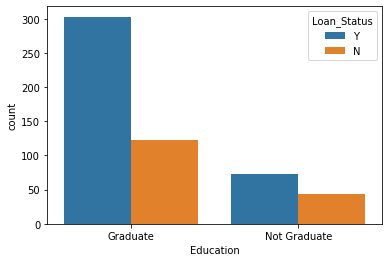

In [17]:
sns.countplot(loan_prediction_train['Education'], hue = loan_prediction_train['Loan_Status'])

In [149]:
loan_prediction_train['Education'].replace('Not Graduate',0,inplace=True)
loan_prediction_train['Education'].replace('Graduate',1,inplace=True)

loan_prediction_train['Married'].replace('No',0,inplace=True)
loan_prediction_train['Married'].replace('Yes',1,inplace=True)

loan_prediction_train['Gender'].replace('Female',0,inplace=True)
loan_prediction_train['Gender'].replace('Male',1,inplace=True)

loan_prediction_train['Self_Employed'].replace('No',0,inplace=True)
loan_prediction_train['Self_Employed'].replace('Yes',1,inplace=True)

In [150]:
loan_prediction_train['Loan_Status'].replace('N',0,inplace=True)
loan_prediction_train['Loan_Status'].replace('Y',1,inplace=True)

In [151]:
loan_prediction_train['Property_Area'].replace('Urban',0,inplace=True)
loan_prediction_train['Property_Area'].replace('Rural',1,inplace=True)
loan_prediction_train['Property_Area'].replace('Semiurban',2,inplace=True)

Посмортим на heatmap данных:

(11.0, 0.0)

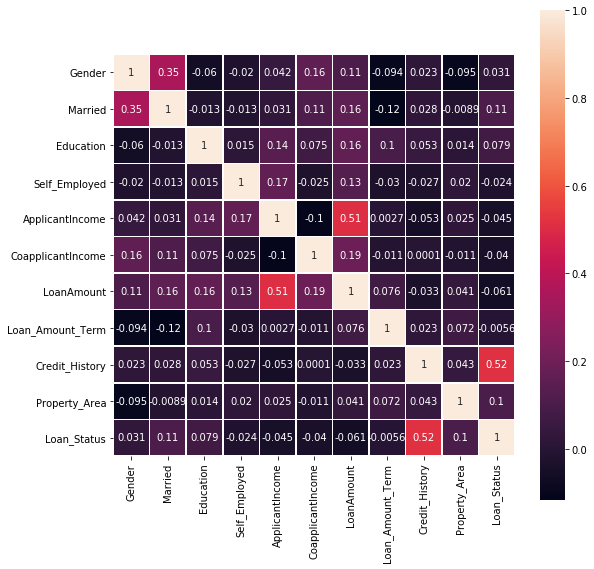

In [152]:
fig, ax = plt.subplots(figsize=(9,9))
ax = sns.heatmap(loan_prediction_train.corr(), annot=True, linewidths=.5, square=True, ax= ax)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

Исключим некоторые самые незначительные признаки:

In [154]:
train = loan_prediction_train.drop(columns = ['CoapplicantIncome', 'Loan_Amount_Term', 'Loan_ID'])

(9.0, 0.0)

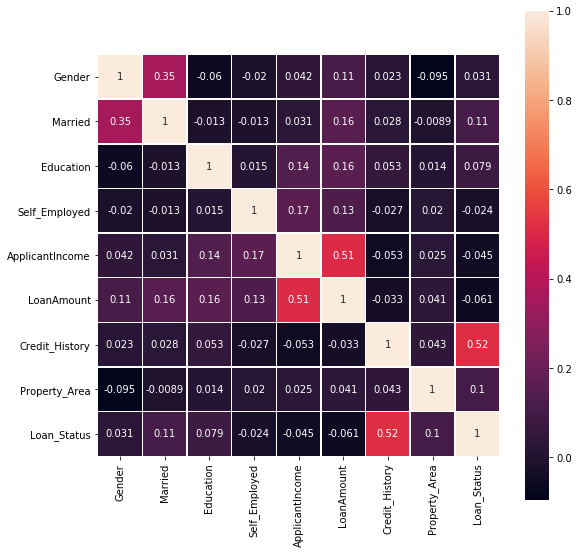

In [74]:
fig, ax = plt.subplots(figsize=(9,9))
ax = sns.heatmap(train.corr(), annot=True, linewidths=.5, square=True, ax= ax)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

Построем диаграммы рассеяния:

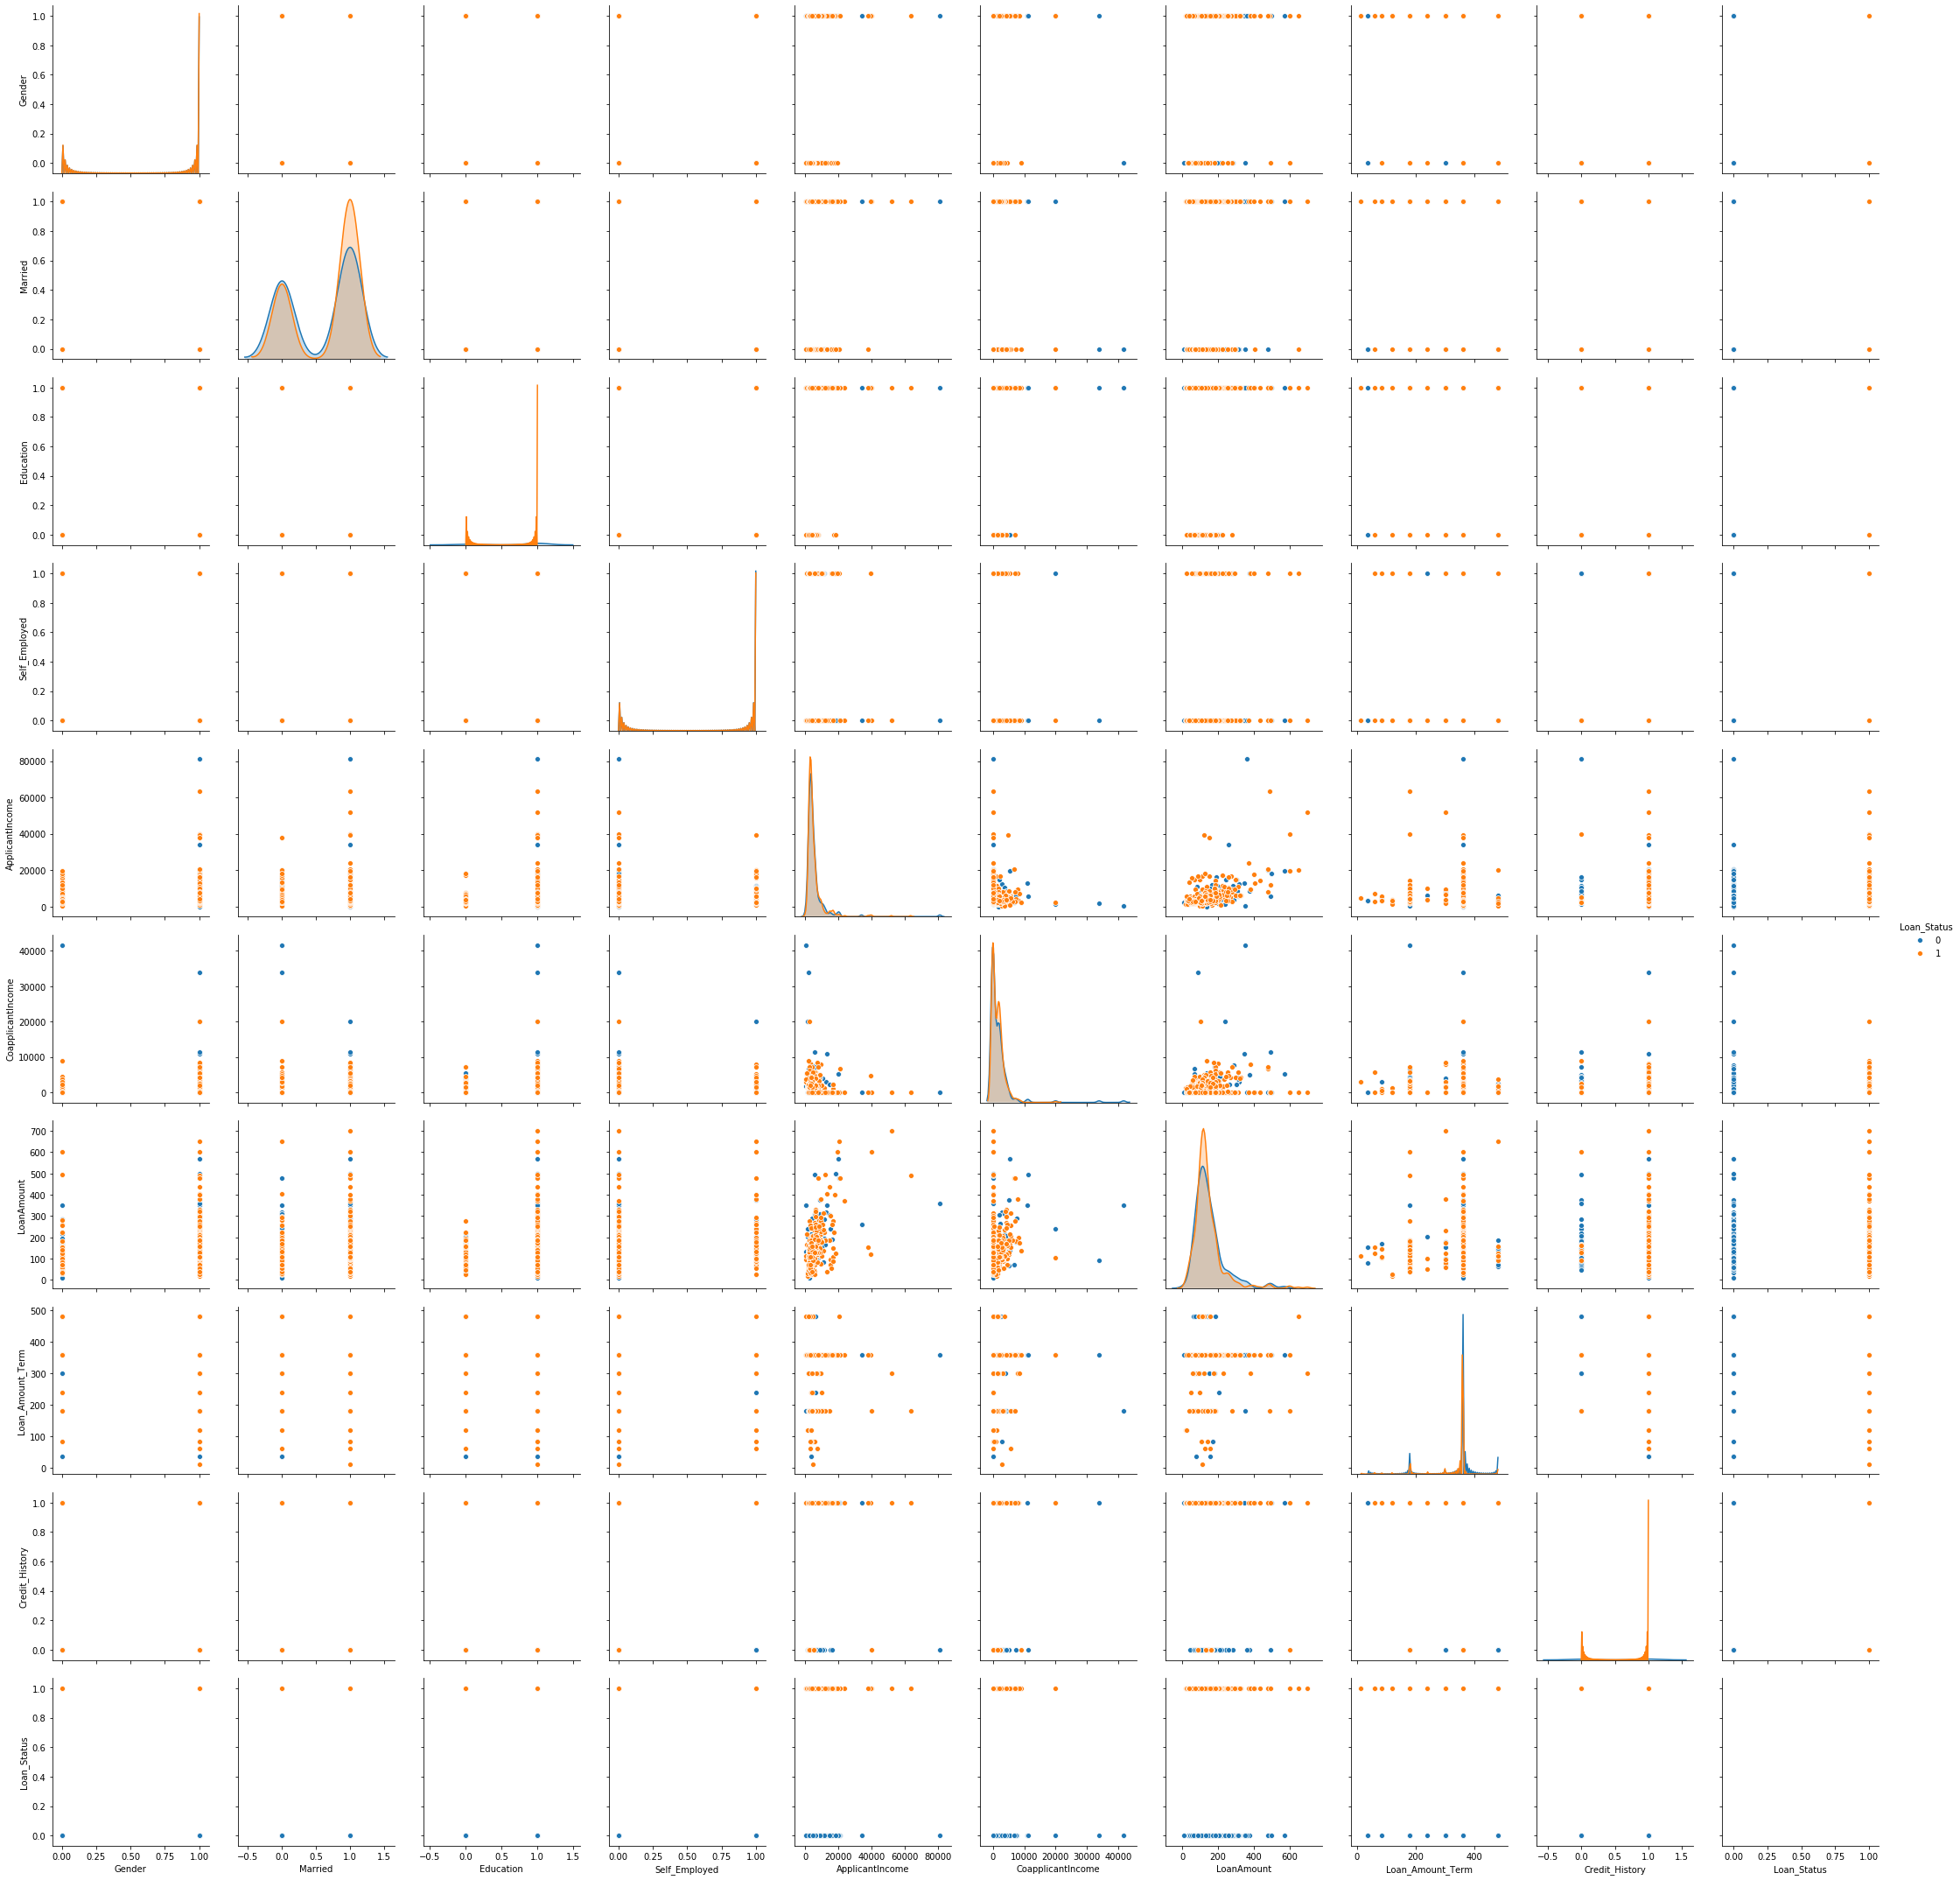

In [38]:
sns.pairplot(loan_prediction_train, hue = 'Loan_Status', height = 3)
plt.show()

In [155]:
train.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,146.412162,1.0,0,1
1,1,1,1,1,0,4583,128.000000,1.0,1,0
2,1,1,0,1,1,3000,66.000000,1.0,0,1
3,1,1,0,0,0,2583,120.000000,1.0,0,1
4,1,0,0,1,0,6000,141.000000,1.0,0,1
5,1,1,2,1,1,5417,267.000000,1.0,0,1
6,1,1,0,0,0,2333,95.000000,1.0,0,1
7,1,1,3+,1,0,3036,158.000000,0.0,2,0
8,1,1,2,1,0,4006,168.000000,1.0,0,1
9,1,1,1,1,0,12841,349.000000,1.0,2,0


In [169]:
X = train.drop(columns = ['Dependents', 'Loan_Status'])
y = train['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [170]:
clf = RandomForestClassifier(random_state=42, max_depth = 10, min_samples_split = 2, n_estimators = 100, oob_score=True)
clf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [159]:
probs = clf.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
auc

0.8219696969696969

In [162]:
y_pred = clf.predict(X_test)
print ("AUC-ROC = ", roc_auc_score(y_test, y_pred))

AUC-ROC =  0.7069377990430621


Построим ROC-кривую:

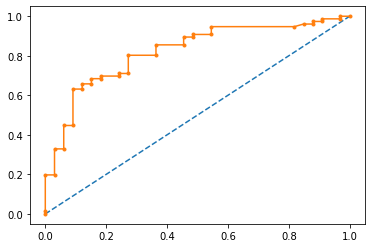

In [117]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

Используем логистическую регрессию:

In [163]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(n_jobs = 2, random_state = 42)

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=2, penalty='l2', random_state=42,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [164]:
y_pred = model.predict(X_test)

In [165]:
accuracy_score(y_test, y_pred)

0.7889908256880734

In [166]:
roc_auc_score(y_test, y_pred)

0.6858054226475279

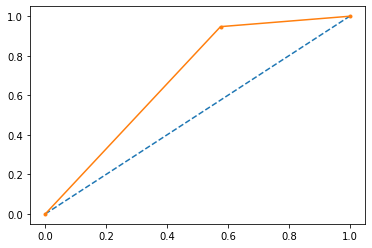

In [141]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()